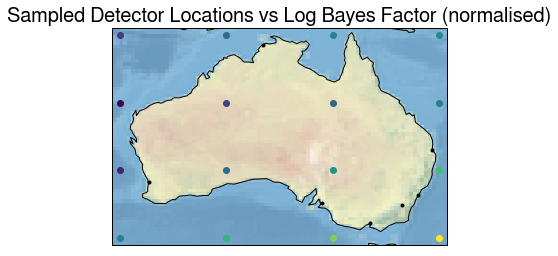

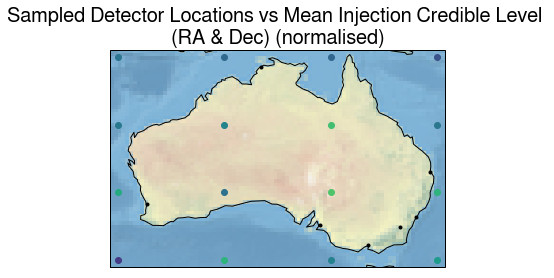

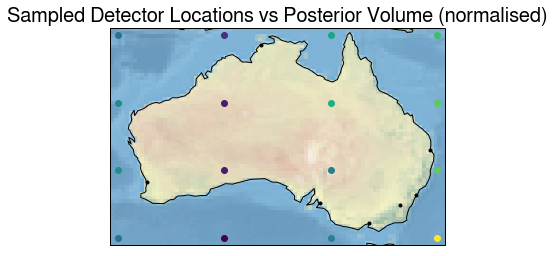

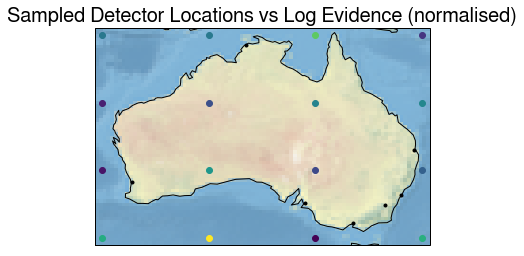

In [8]:
#Mitchell Schiworski, Jan 2019
#
#Code to create  surface plots of the data from the 'credible_levels.txt' file

import numpy as np
import bilby
import gwinc
import matplotlib.pyplot as plt
import functools
import sys
import cartopy.crs as ccrs

def normalise_vector(vector) :
    #normalises the vector passed to the function
    norm_vector = [( i - min(vector))/( max(vector) - min(vector) ) for i in vector]
    return norm_vector

#------ Create and Setup Output file -----
try:
    fp = open('./OZHF_locations_with_H1_L1_V1_outdir/previous_runs/credible_levels_02.txt',mode='r')
except IOError:
    print('Error opening file, exiting ...')
    sys.exit

#------ read from file -------
lats = []
longs = []
bayes_factors = []
RA_cred = []
Dec_cred = []
Posterior_Volume = []
bayes_evidence=[]
for i,line in enumerate(fp) :
    line = " ".join(line.split())
    line = line.split(" ")
    if i == 0:
        continue
    lats.append(line[0])
    longs.append(line[1])
    RA_cred.append(line[2])
    Dec_cred.append(line[3])
    bayes_factors.append(line[4])
    bayes_evidence.append(line[5])
    Posterior_Volume.append(line[6])

mean_cred = [(float(i)+float(j))/2 for i in RA_cred for j in Dec_cred]
#-------- Create list of lat/longs & plot over map--------

#create meshgrid of lat/long inside a rectangle conatining australia
latitude_limits =  [-40.0,-11.0] #min/max values of lat/long
longitude_limits = [112.0,154.0]
number_of_latitude_points = 15
number_of_longitude_points = 15

#normalise and convert to float
bayes_factors=[float(i) for i in bayes_factors]
bayes_factors=normalise_vector(bayes_factors)

bayes_evidence=[float(i) for i in bayes_evidence]
bayes_evidence=normalise_vector(bayes_evidence)

Posterior_Volume=[float(i) for i in Posterior_Volume]
Posterior_Volume=normalise_vector(Posterior_Volume)

#cred_area=[float(i) for i in cred_area]
#cred_area=normalise_vector(cred_area)

mean_cred=normalise_vector(mean_cred)

lats=[float(i) for i in lats]
longs=[float(i) for i in longs]


#----------------
def plot_cities() :
    
    #---plot capital cities---
                 #  Adel ,  Perth,   Darw,  Bris ,   Syd , Can   , Melb  #
    city_lats =  [-34.92 , -31.95, -12.46, -27.47, -33.87, -35.28, -37.81]
    city_longs = [ 138.59, 115.85, 130.84, 153.02, 151.21, 149.13, 144.96]
    
    for ii in range(len(city_lats)) :
        plt.plot(city_longs[ii],city_lats[ii],marker='.',color='black',linestyle="")
        

def plot_cmap(cmap, ncolor):
    """ 
    A convenient function to plot colors of a matplotlib cmap
 
    Args:
        ncolor (int): number of color to show
        cmap: a cmap object or a matplotlib color name
    """
 
    if isinstance(cmap, str):
        try:
            cm = plt.get_cmap(cmap)
        except ValueError:
            print("WARNINGS :", cmap, " is not a known colormap")
            cm = plt.cm.gray
    else:
        cm = cmap
 
    with mpl.rc_context(mpl.rcParamsDefault):
        fig = plt.figure(figsize=(6, 1), frameon=False)
        ax = fig.add_subplot(111)
        ax.pcolor(np.linspace(1, ncolor, ncolor).reshape(1, ncolor), cmap=cm)
        ax.set_title(cm.name)
        xt = ax.set_xticks([])
        yt = ax.set_yticks([])
    return fig


#---------------


#---- Plot the sampled locations over map of Aus ----

bayes_fig = plt.figure(1)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plot_cities()
plt.xlim(longitude_limits[0]-1,longitude_limits[1]+1)
plt.ylim(latitude_limits[0]-1,latitude_limits[1]+1)
for i in range(len(lats)) :
    plt.plot(longs[i],lats[i],color=plt.cm.viridis(bayes_factors[i]),marker='o',linestyle="")
#plot_cmap(plt.cm.jet,3)
plt.title("Sampled Detector Locations vs Log Bayes Factor (normalised)")

credible_fig = plt.figure(2)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plot_cities()
plt.xlim(longitude_limits[0]-1,longitude_limits[1]+1)
plt.ylim(latitude_limits[0]-1,latitude_limits[1]+1)
for i in range(len(lats)) :
    plt.plot(longs[i],lats[i],color=plt.cm.viridis(mean_cred[i]),marker='o',linestyle="")
plt.title("Sampled Detector Locations vs Mean Injection Credible Level \n(RA & Dec) (normalised)")

pvolume_fig = plt.figure(3)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plot_cities()
plt.xlim(longitude_limits[0]-1,longitude_limits[1]+1)
plt.ylim(latitude_limits[0]-1,latitude_limits[1]+1)
for i in range(len(lats)) :
    plt.plot(longs[i],lats[i],color=plt.cm.viridis(Posterior_Volume[i]),marker='o',linestyle="")
plt.title("Sampled Detector Locations vs Posterior Volume (normalised)")

evidence_fig = plt.figure(4)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plot_cities()
plt.xlim(longitude_limits[0]-1,longitude_limits[1]+1)
plt.ylim(latitude_limits[0]-1,latitude_limits[1]+1)
for i in range(len(lats)) :
    plt.plot(longs[i],lats[i],color=plt.cm.viridis(bayes_evidence[i]),marker='o',linestyle="")
plt.title("Sampled Detector Locations vs Log Evidence (normalised)")
#plt.colorbar(ax)

plt.show()





In [13]:
def convert_to_coord_matrix(vector) :
    #converts a vector back into a square meshgrid of co-ords.
    n = int(np.sqrt(float(len(vector))))
    Z = [[0] * n for i in range(n)]
    index_count=0
    for ii in range(n):
        for jj in range(n):
            Z[ii][jj] = vector[index_count]
            index_count=index_count+1
    return(Z)

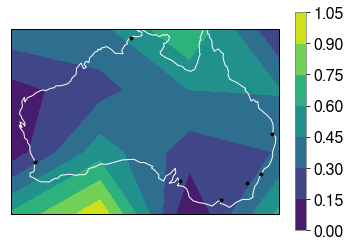

In [18]:
#create meshgrid of lat/long inside a rectangle conatining australia
latitude_limits =  [-40.0,-11.0] #min/max values of lat/long
longitude_limits = [112.0,154.0]
number_of_latitude_points = 4
number_of_longitude_points = 4

#create a meshgrid of points within rectangle defined by the limits
mesh_lat, mesh_long = np.meshgrid(np.linspace(latitude_limits[0],latitude_limits[1],number_of_latitude_points),\
                                    np.linspace(longitude_limits[0],longitude_limits[1],number_of_longitude_points))



ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='white')
plot_cities()
plt.contourf(mesh_long,mesh_lat,convert_to_coord_matrix(bayes_evidence))
plt.colorbar()
plt.show()